In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This data set breaks down personality type metrics by age, gender, interest, and education.

In [17]:
df=pd.read_csv('personalitydata.csv')
rows, columns=df.shape
print(f"There are {rows} rows")
print(f"There are {columns} columns")

There are 128061 rows
There are 9 columns


The rows are individual people.

The first column records age, the second column records gender, the third column records whether they are educated or not, the fourth column records the individual's introversion score on a scale of 1-10, the fifth column records their sensing score, the sixth column records their thinking score, the seventh column records their judging score, the eighth column records their primary interest, and the final column records their personality type.

In [61]:
df2 = df.dtypes.reset_index()
df2["Type"]=["Numerical","Nominal","Numerical","Numerical","Numerical","Numerical","Numerical","Nominal","Nominal"]
print(df2)

                index        0       Type
0                 Age    int64  Numerical
1              Gender   object    Nominal
2           Education    int64  Numerical
3  Introversion Score  float64  Numerical
4       Sensing Score  float64  Numerical
5      Thinking Score  float64  Numerical
6       Judging Score  float64  Numerical
7            Interest   object    Nominal
8         Personality   object    Nominal


In [79]:
columns_to_analyze = ['Age', 'Education','Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']
statistics_list = []
for column in columns_to_analyze:
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode()[0] 
    std_dev_value = df[column].std()
    quartiles = df[column].quantile([0.25, 0.5, 0.75])
    statistics_list.append({
        'Column': column,
        'Mean': mean_value,
        'Median': median_value,
        'Mode': mode_value,
        'Standard Deviation': std_dev_value,
        '25th Percentile': quartiles[0.25],
        '50th Percentile': quartiles[0.5],
        '75th Percentile': quartiles[0.75]
    })
statistics_df = pd.DataFrame(statistics_list)
print(statistics_df)

               Column       Mean     Median     Mode  Standard Deviation  \
0                 Age  26.349091  25.000000  22.0000            4.908022   
1           Education   0.411156   0.000000   0.0000            0.492045   
2  Introversion Score   4.996387   4.993640   0.8524            2.888636   
3       Sensing Score   5.081893   5.124169   0.0000            1.183236   
4      Thinking Score   4.988040   4.984180   0.0805            2.886018   
5       Judging Score   4.578293   4.690653   0.0000            1.391582   

   25th Percentile  50th Percentile  75th Percentile  
0        23.000000        25.000000        29.000000  
1         0.000000         0.000000         1.000000  
2         2.490710         4.993640         7.500170  
3         4.315659         5.124169         5.892288  
4         2.488630         4.984180         7.492550  
5         3.709353         4.690653         5.561229  


In [81]:
categorical_columns = ['Gender', 'Interest', 'Personality']
categorical_statistics_list = []
for column in categorical_columns:
    unique_count = df[column].nunique() 
    mode_value = df[column].mode()[0]   
    mode_frequency = df[column].value_counts()[mode_value]
    categorical_statistics_list.append({
        'Column': column,
        'Unique Count': unique_count,
        'Mode': mode_value,
        'Mode Frequency': mode_frequency
    })
categorical_statistics_df = pd.DataFrame(categorical_statistics_list)
print(categorical_statistics_df)

        Column  Unique Count     Mode  Mode Frequency
0       Gender             2     Male           70432
1     Interest             5  Unknown           48835
2  Personality            16     ENFP           34404


                    Missing Count  Missing Percentage  \
Age                             0                 0.0   
Gender                          0                 0.0   
Education                       0                 0.0   
Introversion Score              0                 0.0   
Sensing Score                   0                 0.0   
Thinking Score                  0                 0.0   
Judging Score                   0                 0.0   
Interest                        0                 0.0   
Personality                     0                 0.0   

                                     Summary  
Age                 nulls: 0.0/128061 (0.0%)  
Gender              nulls: 0.0/128061 (0.0%)  
Education           nulls: 0.0/128061 (0.0%)  
Introversion Score  nulls: 0.0/128061 (0.0%)  
Sensing Score       nulls: 0.0/128061 (0.0%)  
Thinking Score      nulls: 0.0/128061 (0.0%)  
Judging Score       nulls: 0.0/128061 (0.0%)  
Interest            nulls: 0.0/128061 (0.0%)  
Person

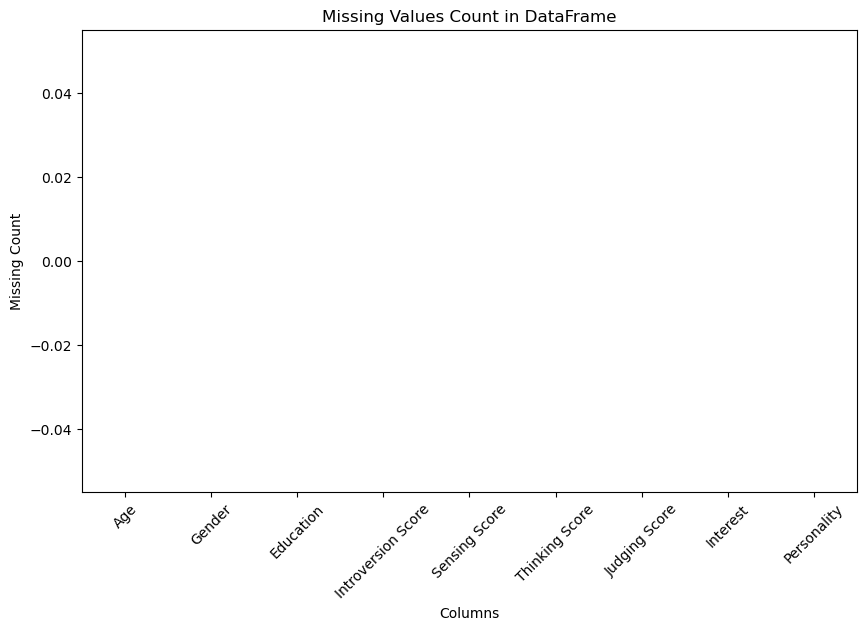

In [91]:
missing_counts = df.isnull().sum() 
total_counts = df.shape[0]          
missing_percentage = (missing_counts / total_counts) * 100 

missing_summary_df = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing Percentage': missing_percentage
})
missing_summary_df['Summary'] = missing_summary_df.apply(
    lambda x: f'nulls: {x["Missing Count"]}/{total_counts} ({x["Missing Percentage"]:.1f}%)', axis=1)
print(missing_summary_df)
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_summary_df.index, y='Missing Count', data=missing_summary_df, hue=missing_summary_df.index, legend=False, palette='viridis')
plt.title('Missing Values Count in DataFrame')
plt.xlabel('Columns')
plt.ylabel('Missing Count')
plt.xticks(rotation=45)
plt.show()